# Домашнее задание №2.

*Выполнила: Книс Надежда*

## Связанные выборки

### seattle
В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats

import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('seattle.txt', sep='\t')
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


**(1 БАЛЛ)**. Визуализируем значения цен (переменной `Price`) за 2001 и 2002 годы. Постройте несколько графиков (boxplot, violinplot). Сделайте выводы о том, как меняется распределение цены в зависимости от года. Сделайте выводы касательно среднего и дисперсии. Предположите, глядя на графики, изменилась ли цена?

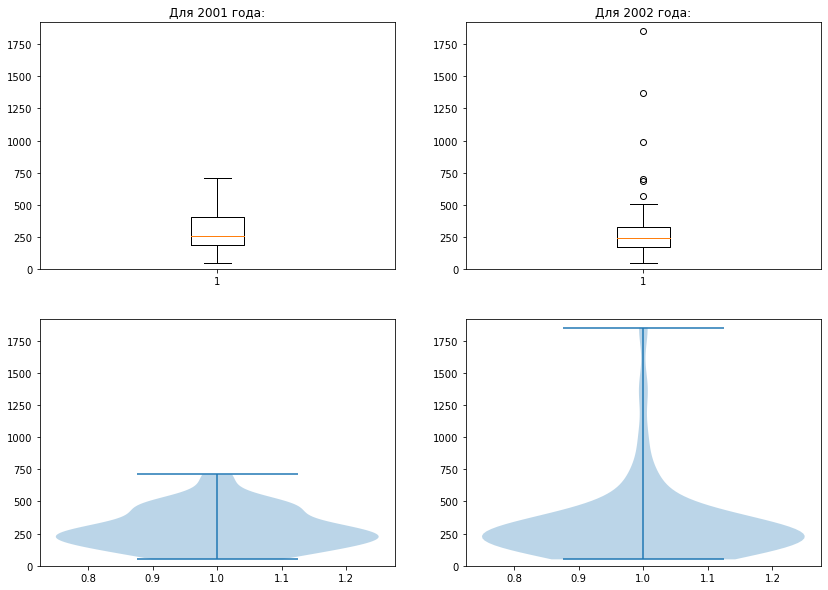

In [4]:
fig, ax = plt.subplots(2,2, figsize=(14,10))

ax[0][0].boxplot(df[df['Year']==2001]['Price'])
ax[0][0].set_title('Для 2001 года:')
ax[1][0].violinplot(df[df['Year']==2001]['Price'])

ax[0][1].boxplot(df[df['Year']==2002]['Price'])
ax[0][1].set_title('Для 2002 года:')
ax[1][1].violinplot(df[df['Year']==2002]['Price'])

maxim = df['Price'].max()
for ax in ax.ravel():
    ax.set_ylim((0, maxim + 70))

Медианы в обоих случаях почти равны, однако среднее значение и дисперсия будут гораздо больше в 2002 году, нежели в 2001, что может быть обусловлено сильными выбросами, поскольку именно дисперсия и среднее наиболее чувствительны к ним. То есть, средняя цена скорее всего не изменилась, если не учитывать воздействие выбросов. Посчитаем среднее и дисперсию для цен с помощью изученных методов в pandas:

In [5]:
df2001 = df[df['Year'] == 2001]
df2002 = df[df['Year'] == 2002]
print(f'Для 2001 года: среднее - {df2001["Price"].mean()}, дисперсия - {df2001["Price"].var()}')
print(f'Для 2002 года: среднее - {df2002["Price"].mean()}, дисперсия - {df2002["Price"].var()}')

Для 2001 года: среднее - 288.92654000000005, дисперсия - 24893.82058743715
Для 2002 года: среднее - 329.25714, дисперсия - 100381.27755306165


В итоге, дисперсия значительно отличается по выборкам, и среднее значение в 2002 году тоже значительно выше, чем в 2001. Однако медиана в обеих выборках даже по графикам находится на уровне примерно 250-260, что говорит о значительном влиянии выбросов на показатели второй выборки, поэтому предположение, о том, что в среднем цены за год не изменились стоит проверить статистически. 

**(2 БАЛЛА)**. Сформулируйте нулевую и альтернативную гипотезу. Выберите $\alpha$. Обоснуйте свой выбор касательно альтернативы (одно- или двусторонняя гипотеза). Выберите критерий, которым Вы будете проверять гипотезу, выпишите его формулу и распределение, которому этот критерий подчиняется при справедливости нулевой гипотезы. Обоснуйте свой выбор. Постарайтесь красиво записать гипотезы (посмотрите в оформление ячеек из тетрадки с семинара по гипотезам)

Проверим гипотезу о равенстве средних цен на недвижимость в Сиэтле в 2001 и 2002 году. Возьмём $\alpha = 0.05$.
Сформулируем гипотезы:

$$ H_0: \{μ1 = μ2\} $$
$$ H_1: \{μ1 \neq μ2\} $$


Мною была выбрана двустороняя гипотеза, так как нужно понять, изменились ли в среднем цены за год, а ответом на этот вопрос может быть "да" или "нет", то если либо средние равны, либо не равны. 

Для проверки гипотезы используем t-тест, однако поскольку дисперсии не равны, нужно использовать t-тест Уэлча. Конечно, тест требует нормального распределения статистики, однако в нашем случае выборка имеет небольшой объем и отдалённо напоминает нормальное, поэтому принимаем как данность, что выборка распределена нормально.
Формула для расчета t-теста:

$$t={\dfrac {{\bar {X}}-{\bar {Y}}}{\sqrt {{\dfrac {{\hat {\sigma }}_{x}^{2}}{n_{x}}}+{\dfrac {{\hat {\sigma }}_{y}^{2}}{n_{y}}}}}}$$

При справедливости нулевой гипотезы распределение будет приблизительно являться распределением Стьюдента.

**(2 БАЛЛА)** Реализуйте Ваш критерий и сам механизм проверки гипотезы вручную. Сделайте вывод об отвержении или не отвержении гипотезы. Сравните свои результаты со встроенным тестом из пакета scipy.stats (если он там есть)

In [7]:
s1 = df2001['Price']
s2 = df2002['Price']

mean1, mean2 = s1.mean(), s2.mean()
std1, std2 = s1.std(), s2.std()

n1, n2 = len(s1), len(s2)
dff = (std1**2/n1 + std2**2/n2)**2 / ((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))
t_stat = (mean1 - mean2) / np.sqrt(std1**2/n1 + std2**2/n2)

print(f'Тестовая статистика - {t_stat}')
print(f'Число степеней свободы - {int(dff)}')

Тестовая статистика - -0.8057258725189664
Число степеней свободы - 71


Для полученного числа степеней свободы, критическая область будет находиться левее  -1.66 и правее +1.66. Поскольку тестовая статистика не попадает в критическую область, нулевая гипотеза не отвергается. Проверим также гипотезу методами библиотеки scipy.

In [8]:
scipy.stats.ttest_ind(s1, s2, equal_var=False)

Ttest_indResult(statistic=-0.8057258725189664, pvalue=0.42305786816462243)

Тестовая статистика получилась точно такой же, как и была получена в результате ручного рассчета. значение p-value показывает, что вероятность совершения ошибки первого рода равно 0.42, это значит, что вероятность отвергнуть верную нулевую гипотезу равно 42%. Это больше, чем заданный уровень доверия $\alpha = 0.05$, поэтому нулевая гипотеза вновь не отвергается. Исходя из проведённых тестом можно заключить, что *равенство средних цен на недвижимость в районе Сиэтла в 2001 и 2002 году возможно.*

## Несвязанные выборки

### mtcars
В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон); 
2. cyl — количество цилиндров мотора;
3. disp — объем мотор (куб. дюйм);
4. hp — мощность мотора (в лошадиных силах);
5. drat — передаточное число редуктора заднего моста;
6. wt — вес (тысяч фунтов);
7. qsec — время, за которое автомобиль проезжает 1/4 мили;
8. vs — тип двигателя (0 = V-образный, 1 = рядный);
9. am — тип коробки передач (0 = автоматическая, 1 = ручная);
10. gear — количество передних передач; 
11. carb — количество карбюраторов.



In [9]:
dfn = pd.read_csv('mtcars.csv', index_col=0)
dfn.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
manufacturer,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
dfn.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Мы хотим ответить на следующие вопросы:

- Влияет ли тип двигателя на расход топлива? 
- Влияет ли объем мотора на расход топлива? 



**(1 БАЛЛ)**. Постройти графики для каждого вопроса. Для первого вопроса можете вновь использовать violinplot, но можете подобрать и другой график. Подумайте, какой график подходит для второго вопроса и нарисуйте его. Попробуйте сделать выводы на основе этих графиков (как распределены признаки, их средние и дисперсии).

Text(0.5, 1.0, 'Fuel consumption by value of the engine')

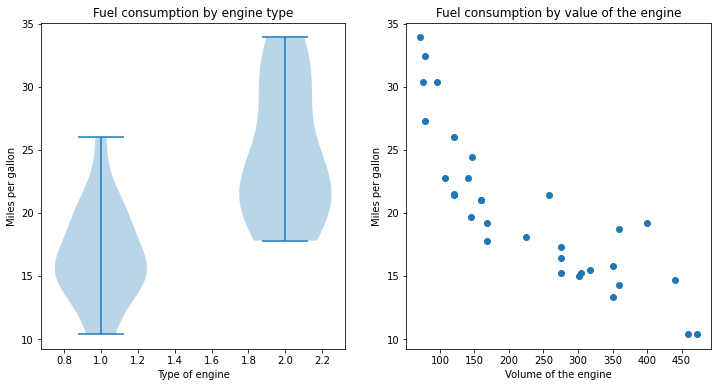

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].violinplot([dfn[dfn['vs']==0]['mpg'], dfn[dfn['vs']==1]['mpg']])
ax[1].scatter(dfn['disp'], dfn['mpg'])

ax[0].set_xlabel('Type of engine')
ax[0].set_ylabel('Miles per gallon')
ax[0].set_title('Fuel consumption by engine type')

ax[1].set_xlabel('Volume of the engine')
ax[1].set_ylabel('Miles per gallon')
ax[1].set_title('Fuel consumption by value of the engine')

Для визуализации ответа на второй вопрос была выбрана диаграмма рассеяния, так как она способна отразить взаимозависимость двух переменных в виде корреляционного поля. 

1. Исходя из графика, полученного для зависимости расхода топлива от типа двигателя, можно предположить, что у рядного двигателя в среднем получается миль на один галлон, чем у v-образного двигателя. Дисперсии выглядят схожими, а распределение отдалённо похоже на нормальное, однако не позволяет определить фактический тип распределения из-за малого объёма выборки, аналогично примеру из первого задания.
2. На графике можно заметить обратную линейную или экпоненциальную зависимость расхода топлива от объёма мотора. 

In [16]:
dfn1 = dfn[dfn['vs'] == 0][['mpg', 'vs']]
dfn2 = dfn[dfn['vs'] == 1][['mpg', 'vs']]
print(f'Для V-образного двигателя: среднее - {dfn1["mpg"].mean()}, дисперсия - {dfn1["mpg"].var()}')
print(f'Для рядного двигателя: среднее - {dfn2["mpg"].mean()}, дисперсия - {dfn2["mpg"].var()}')
print(f'Отношение дисперсий: {dfn2["mpg"].var() / dfn1["mpg"].var()}')

Для V-образного двигателя: среднее - 16.616666666666664, дисперсия - 14.904999999999996
Для рядного двигателя: среднее - 24.557142857142857, дисперсия - 28.933406593406588
Отношение дисперсий: 1.941187963328185


**(2 БАЛЛА)**. Реализуйте решение для первого вопроса. Подумайте как можно измерить влияние типа двигателя на расход топлива. Предложите алгоритм и опишите механизм проверки гипотезы в данном задании. Какие должны быть гипотезы? Выберите $\alpha$. Реализуйте этот алгоритм (статистику и распределение) и вручную проверьте Ваши гипотезы, сделайте вывод. Сверьте Ваш результат со встроенной функцией из модуля scipy.stats (если она есть). Постарайтесь записать гипотезы красиво)

Проведем тест Хи-квадрат независимости выборок, чтобы понять, есть ли зависимость между двумя показателями. Гипотезы:

$H_0:$ В генеральной совокупности не существует зависимости между типом двигателя и расходом топлива.

$H_1:$ В генеральной совокупности существует зависимости между типом двигателя и расходом топлива.

Формула для расчёта: $$\chi^2 = \sum{\frac{(f_o - f_e)^2}{f_e}}$$
где $f_e = \frac{f_cf_r}{n}$, а $f_c$  — наблюдаемые частоты в ряду и $f_r$ — наблюдаемые частоты в колонке. Одднако чтобы составить таблицу сопряженности для необходимо ввести категориальную переменную для объёма расхода топлива. 0 - mpg меньше медианного значения, 1 - больше

In [19]:
dfn['cat'] = dfn['mpg'].apply(lambda x: 0 if x < dfn['mpg'].median() else 1)
cto = dfn.groupby('vs')['cat'].value_counts().unstack()
dof = (2-1)*(2-1) # (Rows - 1)(Cols - 1)
critical_value = 6.63

n_total = cto.sum().sum()
n_cat0 = cto[0].sum()
n_cat1 = cto[1].sum()

p_cat0 = n_cat0/n_total
p_cat1 = n_cat1/n_total

n_v = cto.iloc[0].sum()
n_r = cto.iloc[1].sum()

f_e_cat0_v = n_v*p_cat0 
f_e_cat1_v = n_v*p_cat1

f_e_cat0_r = n_r*p_cat0
f_e_cat1_r = n_r*p_cat1

ct_e = np.array([[f_e_cat0_v, f_e_cat1_v], 
                 [f_e_cat0_r, f_e_cat1_r]])

chi_square = ((cto - ct_e)**2/ct_e).sum().sum()
chi_square > critical_value

True

In [20]:
chi_square

10.614877061935886

Посчитанная статистика оказалась в критической области, а это значит, что мы отвергаем $H_0$. В генеральной совокупности зависимость между типом двигателя и расходом топлива существует. Проверим гипотезу также автоматически.

In [21]:
scipy.stats.chi2_contingency(cto, correction=False)

(10.614877061935886,
 0.0011218141180228563,
 1,
 array([[8.4375, 9.5625],
        [6.5625, 7.4375]]))

p-value оказался ниже заданного уровня значимости 5%, что значит, что в данном случае мы также отвергаем нулевую гипотезу, зависимость существует.

**(2 БАЛЛА)**. Реализуйте решение для второго вопроса. Подумайте как можно измерить влияние объема мотора на расход топлива. Предложите алгоритм и опишите механизм проверки гипотезы в данном задании. Какие должны быть гипотезы? Выберите $\alpha$. Реализуйте этот алгоритм (статистику и распределение) и вручную проверьте Ваши гипотезы, сделайте вывод. Сверьте Ваш результат со встроенной функцией из модуля scipy.stats (если она есть). Постарайтесь записать гипотезы красиво)

В данном случае лучше всего будет оценить коэффициент корреляции для двух переменных, а после оценить значимость полученной переменной. Корреляция рассчитывается по формуле: 
$${r} _{XY}={\frac {\sum (X-{\bar {X}})(Y-{\bar {Y}})}{\sqrt {\sum (X-{\bar {X}})^{2}\sum (Y-{\bar {Y}})^{2}}}}$$

In [22]:
x = dfn['mpg'] - dfn['mpg'].mean()
y = dfn['disp'] - dfn['disp'].mean()
corr = (x*y).sum()/np.sqrt(((x**2).sum())*((y**2).sum()))
corr

-0.8475513792624786

Исходя из проведённых расчётов мы получили сильную отрицательную зависимость расхода топлива от объёма топлива. Также проверим коэффициент с помощью методов python 

In [23]:
dfn[['mpg', 'disp']].corr()

,mpg,disp
mpg,1.000000,-0.847551
disp,-0.847551,1.000000


Получили аналогичный результат. Теперь протестируем гипотезы о значимости полученного коэффициента

$Н_0$: различие между выборочным коэффициентом корреляции r и ρ = 0 незначимо,

$Н_1$: различие между r и p=0 значимо, и следовательно, между переменными у и х имеется существенная связь. Из альтернативной гипотезы следует, что нужно воспользоваться двусторонней критической областью. Проверка осуществляется с помощью теста Стьюдента:
$$t={\frac {r{\sqrt {n-2}}}{\sqrt {1-r^{2}}}}$$
где n - число степеней свободы, объём выборки. Условие $\alpha = 0.05$ сохраняется. Объём выборки - 32, соответственно число степеней свободы - 30. Критическая область для распределения Стьюдента для 30 степеней свободы и зананного уровня значимости - $t_{кр} = (-{\infty}; -2.04] \bigcup [2.04; {\infty})$ Рассчитаем тестовую статистику.

In [24]:
corr*np.sqrt(len(dfn['mpg']) - 2)/np.sqrt(1-corr**2)

-8.747151534093915

Тестовая статистика попала в критическую область, значит, мы отвергаем нулевую гипотезу, и корреляция значима.